# Q1 What are the advantages of convolutional layers over fully connected layers in image processing tasks?
Convolutional layers preserve spatial relationships, use shared weights for parameter efficiency, and maintain translation invariance by scanning the same filter, allowing them to detect features regardless of their position in the image.

# Q2 How does pooling help in reducing the computational complexity of a CNN?
Pooling layers reduce feature map dimensions, reducing data processing time. This leads to increased computational efficiency, as fewer neurons and connections reduce memory usage. Additionally, pooling introduces downsampling to prevent overfitting by reducing model sensitivity to small input variations.

# Q3 Compare different types of pooling layers (max pooling, average pooling). What are their respective advantages and disadvantages?
Max Pooling captures prominent features by selecting the maximum value, making the network more robust to noise. Average Pooling retains more information by averaging values, resulting in smoother representations but may less effectively emphasize key features, resulting in less distinct feature maps.


# CNN Architecture

Input Layer: 28x28 grayscale images (MNIST images).
Conv2D Layer 1: 32 filters, 3x3 kernel, ReLU activation.
MaxPooling2D Layer 1: 2x2 pooling.
Conv2D Layer 2: 64 filters, 3x3 kernel, ReLU activation.
MaxPooling2D Layer 2: 2x2 pooling.
Flatten Layer: Converts 2D matrix to 1D vector.
Dense Layer 1: 128 units, ReLU activation.
Dense Layer 2 (Output): 10 units (one for each digit), softmax activation.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')






Epoch 1/10


1500/1500 [==============================] - 10s 6ms/step - loss: 0.1400 - accuracy: 0.9572 - val_loss: 0.0539 - val_accuracy: 0.9842
Epoch 2/10
  28/1500 [..............................] - ETA: 8s - loss: 0.0512 - accuracy: 0.9844

C:\Users\umar1\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 9s 6ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0444 - val_accuracy: 0.9863
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0432 - val_accuracy: 0.9879
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0391 - val_accuracy: 0.9893
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0381 - val_accuracy: 0.9898
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0404 - val_accuracy: 0.9911
Epoch 8/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0396 - val_accuracy: 0.9910

# In Comparison to Previous ANN Model
The ANN model achieved high accuracy but slightly lower than the CNN model, with a training loss of around 97-98%. The CNN model achieved higher accuracy due to its ability to capture spatial features in the data. ANN had faster training time due to fewer parameters and simpler operations, while CNN had slower training time due to the computational cost of convolutional layers. The CNN model outperformed the ANN model in terms of accuracy on the MNIST dataset, highlighting the importance of choosing the right architecture.

# Training and Preprocessing Summarization
Normalization rescales pixel values from [0, 255] to [0, 1], while one-hot encoding converts class labels into vectors. Training parameters include 0.001 learning rate, 32 batch sizes, 10 epochs, Adam optimize

# CallBacks:
EarlyStopping monitors validation loss and stops training when it stops improving, while ModelCheckpoint saves the best model based on validation accuracy.

# Challenges: 
CNNs require longer training time due to computational cost of convolutions, and regularization techniques like dropout or data augmentation may be necessary to combat overfitting.

# Evaluation: 
The CNN model outperforms the ANN model on the MNIST dataset, demonstrating its superior performance in extracting spatial features from image data through convolutional layers.


# Building a simple CNN for a binary classification

# CNN Architecture fo Classification
Input Layer: 150x150 RGB images.
Conv2D Layer 1: 32 filters, 3x3 kernel, ReLU activation, input_shape=(150, 150, 3).
MaxPooling2D Layer 1: 2x2 pooling.
Conv2D Layer 2: 64 filters, 3x3 kernel, ReLU activation.
MaxPooling2D Layer 2: 2x2 pooling.
Conv2D Layer 3: 128 filters, 3x3 kernel, ReLU activation.
MaxPooling2D Layer 3: 2x2 pooling.
Conv2D Layer 4: 128 filters, 3x3 kernel, ReLU activation.
MaxPooling2D Layer 4: 2x2 pooling.
Flatten Layer: Converts 3D feature maps to 1D vector.
Dense Layer 1: 512 neurons, ReLU activation.
Output Layer: 1 neuron (binary classification), sigmoid activation.

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os
from PIL import Image

# Paths to directories
train_dir = 'petImages'
test_dir = 'petImages'

# Function to remove non-image files
def filter_images(directory):
    for subdir, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                img = Image.open(filepath)  # Try opening the file as an image
                img.verify()  # Verify that it's a valid image
            except (IOError, SyntaxError):
                print(f'Removing file: {filepath}')  # Log the file that is being removed
                os.remove(filepath)  # Remove the file if it's not a valid image

# Filter out non-image files
filter_images(train_dir)
filter_images(test_dir)

# Data Augmentation and Normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Only rescale for validation/testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')  # Binary classification

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')  # Binary classification

# Define CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the model
model.save('cnn_model.h5')


Removing file: petImages\Cat\666.jpg
Removing file: petImages\Cat\Thumbs.db
Removing file: petImages\Dog\11702.jpg


C:\ProgramData\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Removing file: petImages\Dog\Thumbs.db
Found 24998 images belonging to 2 classes.
Found 24998 images belonging to 2 classes.
Epoch 1/20
781/781 [==============================] - 325s 414ms/step - loss: 0.6817 - accuracy: 0.5580 - val_loss: 0.6404 - val_accuracy: 0.6709
Epoch 2/20


C:\Users\umar1\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


781/781 [==============================] - 320s 410ms/step - loss: 0.6118 - accuracy: 0.6652 - val_loss: 0.5120 - val_accuracy: 0.7513
Epoch 3/20
781/781 [==============================] - 322s 413ms/step - loss: 0.5423 - accuracy: 0.7228 - val_loss: 0.4244 - val_accuracy: 0.8049
Epoch 4/20
781/781 [==============================] - 324s 415ms/step - loss: 0.4943 - accuracy: 0.7577 - val_loss: 0.4053 - val_accuracy: 0.8105
Epoch 5/20
781/781 [==============================] - 344s 441ms/step - loss: 0.4623 - accuracy: 0.7826 - val_loss: 0.3622 - val_accuracy: 0.8406
Epoch 6/20
781/781 [==============================] - 338s 433ms/step - loss: 0.4259 - accuracy: 0.8010 - val_loss: 0.3555 - val_accuracy: 0.8473
Epoch 7/20
781/781 [==============================] - 356s 455ms/step - loss: 0.3965 - accuracy: 0.8197 - val_loss: 0.3125 - val_accuracy: 0.8618
Epoch 8/20
781/781 [==============================] - 362s 464ms/step - loss: 0.3590 - accuracy: 0.8369 - val_loss: 0.2797 - val_accura

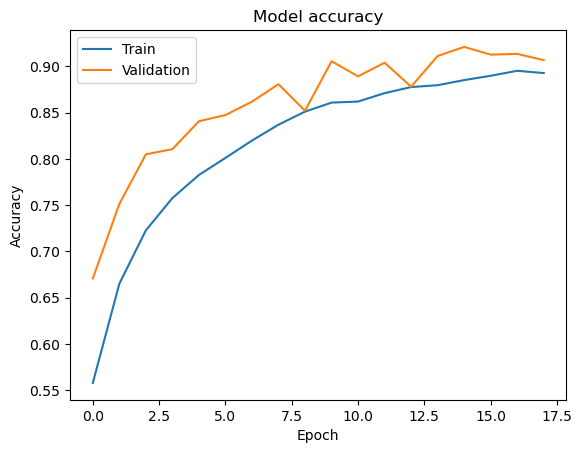

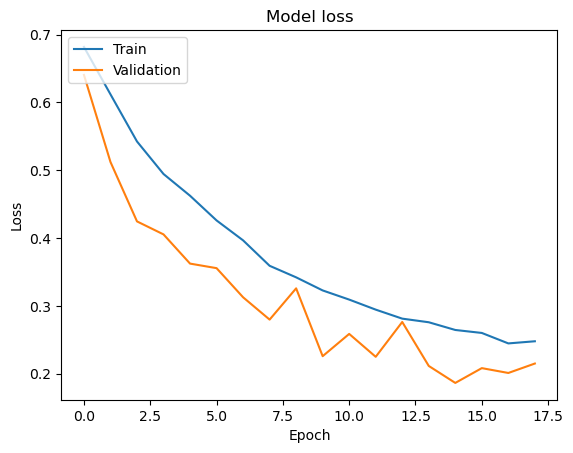

In [7]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# Architecture
The text describes a convolutional (Conv2D) model with 32 filters, a 3x3 kernel size, and ReLU activation. It includes multiple layers, each with varying filters and sizes. The model also includes a flatten layer for converting 3D output into a 1D vector, a fully connected dense layer with 512 units and ReLU activation, and a sigmoid for binary classification.

# Model Compilation
Optimizer: Adam
Loss Function: Binary Crossentropy
Metrics: Accuracy

# Training Process
Data generators apply augmentation and normalization, with 32-epoch batch size and 20 epochs. EarlyStopping monitors validation loss, while ModelCheckpoint saves model with best accuracy.

# Challengence
Invalid Image Files: Some images were corrupted or not in the expected format, leading to errors during training. This was handled by modifying the image loading function to skip invalid files.

# Evaluation
Test accuracy is evaluated on the test dataset post-training completion, with visualizations including an accuracy and loss plot for epoch-wise training and validation accuracy.